<a href="https://colab.research.google.com/github/sudhanshuranjan277/croprecoomendation/blob/main/Croprecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.shape

(2200, 8)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df.isnull().any()

,0
N,False
P,False
K,False
temperature,False
humidity,False
ph,False
rainfall,False
label,False


In [ ]:
print("Number of various crops: ", len(df['label'].unique()))
print("List of crops: ", df['label'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [ ]:
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [ ]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()


In [ ]:
top_5_crops = crop_summary.head(5)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_5_crops.index,
    y=top_5_crops['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=top_5_crops.index,
    y=top_5_crops['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=top_5_crops.index,
    y=top_5_crops['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparison between top 5 crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45,
                  width=600,  # Adjust the width
                  height=400)  # Adjust the height

fig.show()


In [ ]:
labels = ['Nitrogen(N)', 'Phosphorous(P)', 'Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type': 'domain'}, {'type': 'domain'},
                                            {'type': 'domain'}, {'type': 'domain'},
                                            {'type': 'domain'}]])

rice_npk = crop_summary[crop_summary.index == 'rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Rice"), 1, 1)

cotton_npk = crop_summary[crop_summary.index == 'cotton']
values = [cotton_npk['N'][0], cotton_npk['P'][0], cotton_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Cotton"), 1, 2)

jute_npk = crop_summary[crop_summary.index == 'jute']
values = [jute_npk['N'][0], jute_npk['P'][0], jute_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Jute"), 1, 3)

maize_npk = crop_summary[crop_summary.index == 'maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Maize"), 1, 4)

lentil_npk = crop_summary[crop_summary.index == 'lentil']
values = [lentil_npk['N'][0], lentil_npk['P'][0], lentil_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values, name="Lentil"), 1, 5)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

# Update layout with custom size
fig.update_layout(
    title_text="NPK ratio for rice, cotton, jute, maize, lentil",
    width=600,  # Set the width
    height=400,  # Set the height
    annotations=[dict(text='Rice', x=0.06, y=0.8, font_size=15, showarrow=False),
                 dict(text='Cotton', x=0.26, y=0.8, font_size=15, showarrow=False),
                 dict(text='Jute', x=0.50, y=0.8, font_size=15, showarrow=False),
                 dict(text='Maize', x=0.74, y=0.8, font_size=15, showarrow=False),
                 dict(text='Lentil', x=0.94, y=0.8, font_size=15, showarrow=False)]
)

fig.show()


<ipython-input-18-e1ca6d9d4c67>:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-18-e1ca6d9d4c67>:11: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-18-e1ca6d9d4c67>:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-18-e1ca6d9d4c67>:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent

In [ ]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[
         {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs)
cafe_colors =  ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

apple_npk = crop_summary[crop_summary.index=='apple']
values = [apple_npk['N'][0], apple_npk['P'][0], apple_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Apple", marker_colors=cafe_colors),1, 1)

banana_npk = crop_summary[crop_summary.index=='banana']
values = [banana_npk['N'][0], banana_npk['P'][0], banana_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Banana", marker_colors=cafe_colors),1, 2)

grapes_npk = crop_summary[crop_summary.index=='grapes']
values = [grapes_npk['N'][0], grapes_npk['P'][0], grapes_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Grapes", marker_colors=cafe_colors),1, 3)

orange_npk = crop_summary[crop_summary.index=='orange']
values = [orange_npk['N'][0], orange_npk['P'][0], orange_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Orange", marker_colors=cafe_colors),1, 4)

mango_npk = crop_summary[crop_summary.index=='mango']
values = [mango_npk['N'][0], mango_npk['P'][0], mango_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Mango", marker_colors=cafe_colors),1, 5)

coconut_npk = crop_summary[crop_summary.index=='coconut']
values = [coconut_npk['N'][0], coconut_npk['P'][0], coconut_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Coconut", marker_colors=cafe_colors),2, 1)

papaya_npk = crop_summary[crop_summary.index=='papaya']
values = [papaya_npk['N'][0], papaya_npk['P'][0], papaya_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Papaya", marker_colors=cafe_colors),2, 2)

pomegranate_npk = crop_summary[crop_summary.index=='pomegranate']
values = [pomegranate_npk['N'][0], pomegranate_npk['P'][0], pomegranate_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Pomegranate", marker_colors=cafe_colors),2, 3)

watermelon_npk = crop_summary[crop_summary.index=='watermelon']
values = [watermelon_npk['N'][0], watermelon_npk['P'][0], watermelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Watermelon", marker_colors=cafe_colors),2, 4)

muskmelon_npk = crop_summary[crop_summary.index=='muskmelon']
values = [muskmelon_npk['N'][0], muskmelon_npk['P'][0], muskmelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Muskmelon", marker_colors=cafe_colors),2, 5)

fig.update_layout(
    title_text="NPK ratio for fruits",
    annotations=[dict(text='Apple',x=0.06,y=1.08, font_size=15, showarrow=False),
                 dict(text='Banana',x=0.26,y=1.08, font_size=15, showarrow=False),
                 dict(text='Grapes',x=0.50,y=1.08, font_size=15, showarrow=False),
                 dict(text='Orange',x=0.74,y=1.08, font_size=15, showarrow=False),
                dict(text='Mango',x=0.94,y=1.08, font_size=15, showarrow=False),
                dict(text='Coconut',x=0.06,y=0.46, font_size=15, showarrow=False),
                 dict(text='Papaya',x=0.26,y=0.46, font_size=15, showarrow=False),
                 dict(text='Pomegranate',x=0.50,y=0.46, font_size=15, showarrow=False),
                 dict(text='Watermelon',x=0.74,y=0.46, font_size=15, showarrow=False),
                dict(text='Muskmelon',x=0.94,y=0.46, font_size=15, showarrow=False)])
fig.show()

<ipython-input-20-97d6bb6a644c>:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-20-97d6bb6a644c>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-20-97d6bb6a644c>:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-20-97d6bb6a644c>:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Labels for NPK ratios
labels = ['Nitrogen(N)', 'Phosphorous(P)', 'Potash(K)']

# Create a 2x5 subplot layout
specs = [[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}],
         [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs)

# Colors for pie charts
cafe_colors = ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

# Data for fruits
fruits = ['apple', 'banana', 'grapes', 'orange', 'mango']
for i, fruit in enumerate(fruits):
    fruit_npk = crop_summary[crop_summary.index == fruit]
    values = [fruit_npk['N'][0], fruit_npk['P'][0], fruit_npk['K'][0]]
    fig.add_trace(go.Pie(labels=labels, values=values, name=fruit.capitalize(), marker_colors=cafe_colors), 1, i + 1)

# Data for crops
crops = ['rice', 'cotton', 'jute', 'maize', 'lentil']
for i, crop in enumerate(crops):
    crop_npk = crop_summary[crop_summary.index == crop]
    values = [crop_npk['N'][0], crop_npk['P'][0], crop_npk['K'][0]]
    fig.add_trace(go.Pie(labels=labels, values=values, name=crop.capitalize(), marker_colors=cafe_colors), 2, i + 1)

# Update layout with annotations and title
fig.update_layout(
    title_text="NPK Ratio for Fruits and Crops",
    annotations=[
        dict(text='Apple', x=0.06, y=1.08, font_size=15, showarrow=False),
        dict(text='Banana', x=0.26, y=1.08, font_size=15, showarrow=False),
        dict(text='Grapes', x=0.50, y=1.08, font_size=15, showarrow=False),
        dict(text='Orange', x=0.74, y=1.08, font_size=15, showarrow=False),

    ]
)

# Show the figure
fig.show()


<ipython-input-20-bff7b7723e42>:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-20-bff7b7723e42>:26: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
import plotly.graph_objects as go

# Define labels for NPK ratios and the fruits and crops
labels = ['Nitrogen(N)', 'Phosphorous(P)', 'Potash(K)']
fruits = ['apple', 'banana', 'grapes', 'orange', 'mango']
crops = ['rice', 'cotton', 'jute', 'maize', 'lentil']

# Prepare data for fruits
fruit_values = []
for fruit in fruits:
    fruit_npk = crop_summary[crop_summary.index == fruit]
    fruit_values.append([fruit_npk['N'][0], fruit_npk['P'][0], fruit_npk['K'][0]])

# Prepare data for crops
crop_values = []
for crop in crops:
    crop_npk = crop_summary[crop_summary.index == crop]
    crop_values.append([crop_npk['N'][0], crop_npk['P'][0], crop_npk['K'][0]])

# Create a bar chart
fig = go.Figure()

# Add bars for fruits
for i, fruit in enumerate(fruits):
    fig.add_trace(go.Bar(
        x=labels,
        y=fruit_values[i],
        name=fruit.capitalize(),
        marker_color='rgb(255, 128, 0)'  # Custom color for fruits
    ))

# Add bars for crops
for i, crop in enumerate(crops):
    fig.add_trace(go.Bar(
        x=labels,
        y=crop_values[i],
        name=crop.capitalize(),
        marker_color='rgb(0, 153, 204)'  # Custom color for crops
    ))

# Update layout with specified width and height
fig.update_layout(
    title='NPK Ratio Comparison of Fruits and Crops',
    xaxis_title='NPK Ratios',
    yaxis_title='Values',
    barmode='group',
    legend_title='Fruits and Crops',
    width=600,  # Set the width
    height=400  # Set the height
)

# Show the figure
fig.show()


<ipython-input-22-f845ebfae4b0>:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-22-f845ebfae4b0>:18: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
crop_scatter = df[(df['label']=='rice') |
                      (df['label']=='jute') |
                      (df['label']=='cotton') |
                     (df['label']=='maize') |
                     (df['label']=='lentil')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
import plotly.express as px

# Filter data for specific crops
crop_scatter = df[(df['label'] == 'rice') |
                   (df['label'] == 'jute') |
                   (df['label'] == 'cotton') |
                   (df['label'] == 'maize') |
                   (df['label'] == 'lentil')]

# Create scatter plot
fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")

# Update layout with specified dimensions and style
fig.update_layout(
    plot_bgcolor='white',
    width=600,  # Set the width
    height=400  # Set the height
)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the figure
fig.show()


In [ ]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
import plotly.express as px

# Select 5 to 6 specific crops
selected_crops = ['rice', 'jute', 'cotton', 'maize', 'lentil']  # Modify as needed
filtered_crop_summary = crop_summary.loc[selected_crops]

# Create a bar chart
fig = px.bar(
    filtered_crop_summary,
    x=filtered_crop_summary.index,
    y=["rainfall", "temperature", "humidity"],
)

# Update layout with specified title and dimensions
fig.update_layout(
    title_text="Comparison between Rainfall, Temperature, and Humidity",
    plot_bgcolor='white',
    width=600,   # Set the width
    height=400   # Set the height
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the figure
fig.show()


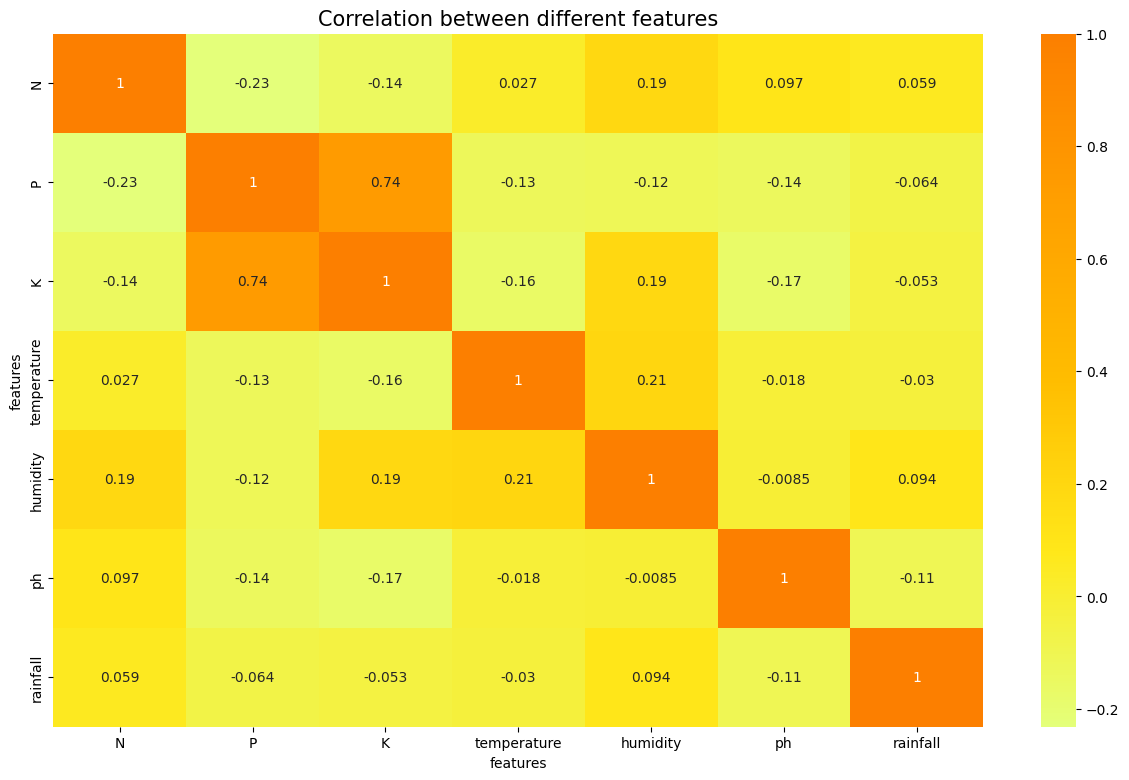

In [ ]:
# Select only numeric columns before calculating correlations
numeric_df = df.select_dtypes(include=['number'])

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(numeric_df.corr(), annot=True,cmap='Wistia' )
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

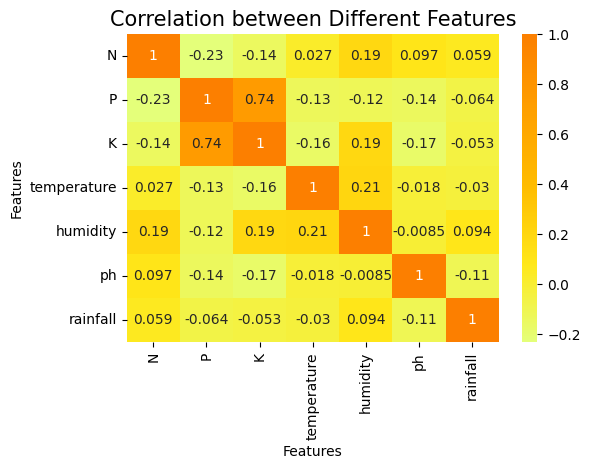

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns before calculating correlations
numeric_df = df.select_dtypes(include=['number'])

# Create a figure with specified size
fig, ax = plt.subplots(1, 1, figsize=(6, 4))  # Width: 6, Height: 4 (in inches)

# Create the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='Wistia', ax=ax)

# Set axis labels
ax.set(xlabel='Features', ylabel='Features')

# Set title
plt.title('Correlation between Different Features', fontsize=15, color='black')

# Show the plot
plt.show()


NameError: name 'y_test' is not defined

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    shuffle = True, random_state = 0)

In [ ]:
# build the lightgbm model
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.076858
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -2.982829
[LightGBM] [Info] Start training from score -3.049078
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] 

LGBMClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


LightGBM Model accuracy score: 0.9894


In [ ]:
y_pred_train = model.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9894


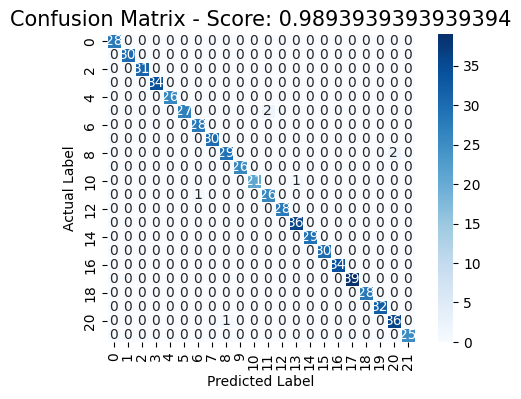

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)

# Create a figure with specified size
plt.figure(figsize=(6, 4))  # Width: 6, Height: 4 (in inches)

# Create the heatmap
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')

# Set axis labels
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Set title with accuracy score
all_sample_title = 'Confusion Matrix - Score: ' + str(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)

# Show the plot
plt.show()


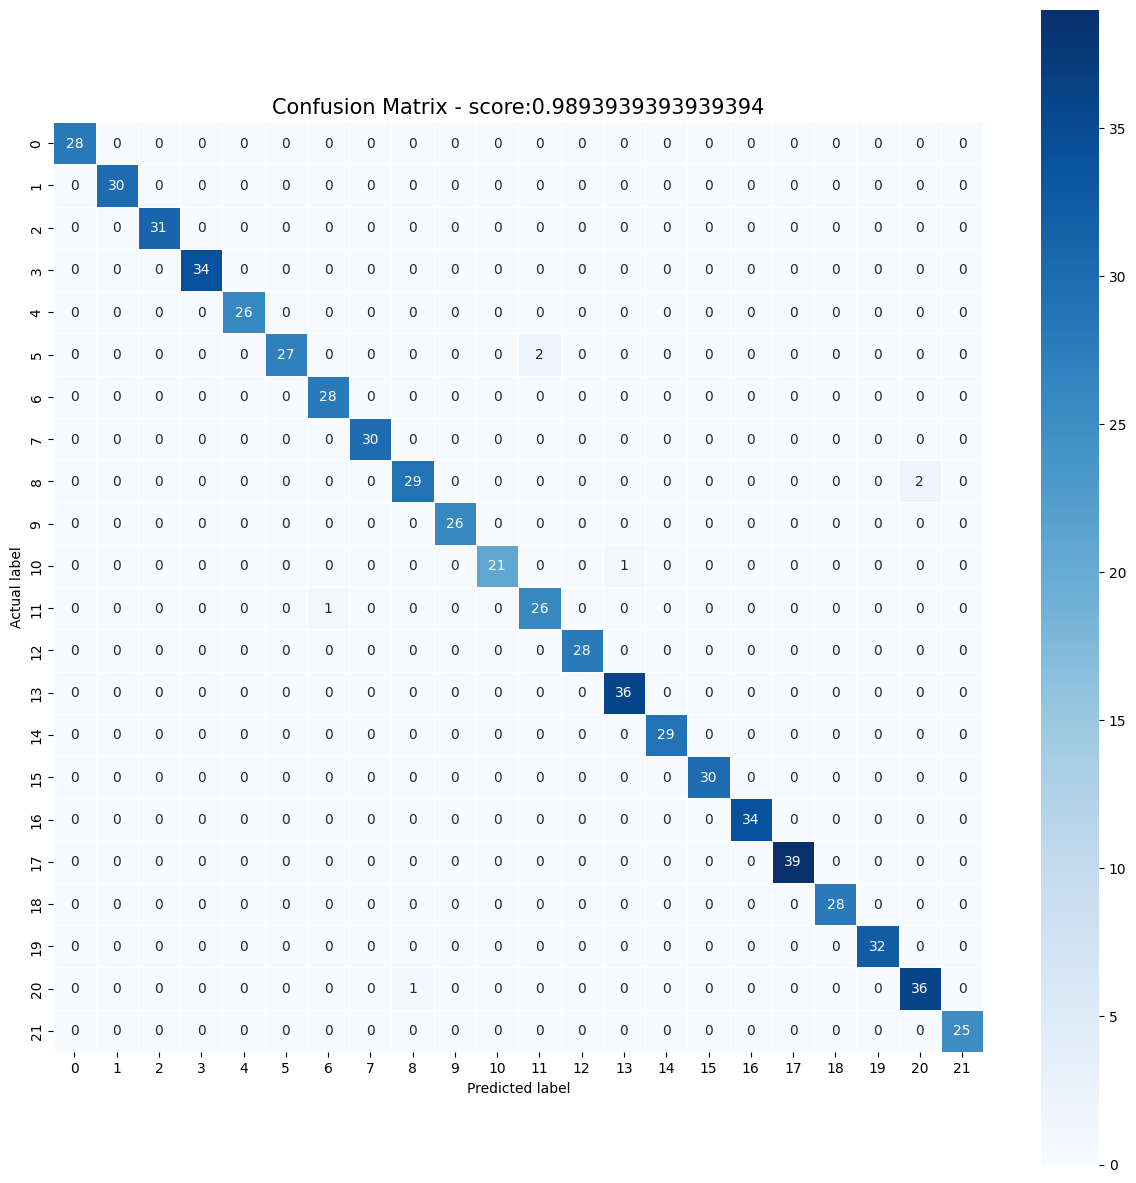

In [ ]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      0.93      0.96        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.97      0.94      0.95        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      0.95      0.98        22
       maize       0.93      0.96      0.95        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.97      1.00      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [ ]:
newdata=model.predict([[90, 42, 43, 20.879744, 75, 5.5,220]])
newdata

array(['rice'], dtype=object)